### Cell 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load Vectorized Matrices from Pickle Files

In [2]:
import pickle

# Load the BoW vectorized matrices
with open('X_train_bow.pkl', 'rb') as f:
    X_train_bow = pickle.load(f)
with open('X_cv_bow.pkl', 'rb') as f:
    X_cv_bow = pickle.load(f)
with open('X_test_bow.pkl', 'rb') as f:
    X_test_bow = pickle.load(f)

# Load the TF-IDF vectorized matrices
with open('X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)
with open('X_cv_tfidf.pkl', 'rb') as f:
    X_cv_tfidf = pickle.load(f)
with open('X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)

# Load the Word2Vec vectorized matrices
with open('X_train_w2v.pkl', 'rb') as f:
    X_train_w2v = pickle.load(f)
with open('X_cv_w2v.pkl', 'rb') as f:
    X_cv_w2v = pickle.load(f)
with open('X_test_w2v.pkl', 'rb') as f:
    X_test_w2v = pickle.load(f)
    
    
    

# Load the y datasets from local files
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_cv.pkl', 'rb') as f:
    y_cv = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)    
    

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def perform_grid_search_cv_logistic_regression(X_cv, y_cv, n_splits=3):
    """
    Perform Grid Search Cross-Validation to find the optimal hyperparameters for Logistic Regression using StratifiedKFold with fewer splits.
    """
    param_grid = {'C': [0.1, 1, 10, 100, 1000]}
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, 
                               cv=stratified_kfold, n_jobs=-1, verbose=3, scoring='accuracy')
    grid_search.fit(X_cv, y_cv)
    best_params = grid_search.best_params_
    cv_scores = grid_search.cv_results_['mean_test_score']
    return best_params, cv_scores

def evaluate_logistic_regression(X_train, y_train, X_test, y_test, params, vectorizer_type):
    """
    Train and evaluate a Logistic Regression classifier, and plot the confusion matrix.
    """
    print(f"Training Logistic Regression model with parameters: {params}")
    logistic_regression = LogisticRegression(C=params['C'], max_iter=1000)
    logistic_regression.fit(X_train, y_train)
    print("Training completed. Evaluating the model...")
    y_pred = logistic_regression.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_labels = np.unique(y_test)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    sns.heatmap(df_cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {vectorizer_type}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, report

def plot_cv_error(cv_scores, params):
    """
    Plot the Cross-Validation error for different hyperparameter values.
    """
    mse = [1 - x for x in cv_scores]
    plt.figure(figsize=(8, 8))
    plt.plot(range(len(params)), mse, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    for i, (param, score) in enumerate(zip(params, mse)):
        plt.annotate(f'({param}, {score:.3f})', (i, score), textcoords='data')
    plt.title('CV Error vs Hyperparameter Values')
    plt.xlabel('Hyperparameter Index')
    plt.ylabel('CV Error')
    plt.show()

## BoW

Certainly! Let's define functions for cross-validation and training using Support Vector Machines (SVM), and then show how to display the results. We'll use the `SVC` classifier from `sklearn.svm` for this example.

### Step-by-Step Plan

1. **Define a function for cross-validation**: This function will perform cross-validation on the training data and return the best hyperparameters.
2. **Define a function for training and evaluating the model**: This function will train the model on the training data and evaluate it on the test data.
3. **Display the results**: Print the accuracy and classification report.

### 1. Define Cross-Validation Function





### 3. Display Results

#### Cell 1: Perform Grid Search Cross-Validation and Plot CV Error



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Optimal Parameters for Logistic Regression (CV) are: {'C': 0.1}


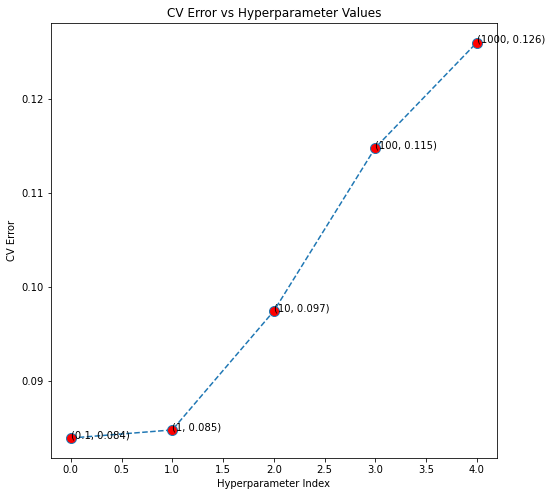

In [22]:
# Perform Grid Search CV for BoW using Logistic Regression on CV data with fewer splits
best_params_cv, cv_scores_cv = perform_grid_search_cv_logistic_regression(X_cv_bow, y_cv, n_splits=5)
print('Optimal Parameters for Logistic Regression (CV) are:', best_params_cv)

# Define the hyperparameter values used in the grid search
params = [0.1, 1, 10, 100, 1000]
plot_cv_error(cv_scores_cv, params)



#### Cell 2: Train and Evaluate SVM Model



Training and evaluating Logistic Regression model for BoW on Test Data...
Training Logistic Regression model with parameters: {'C': 0.1}
Training completed. Evaluating the model...


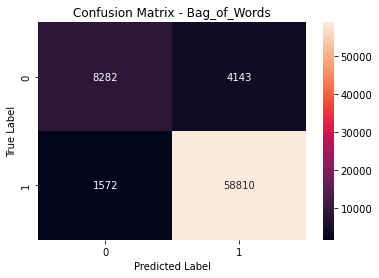

Accuracy (Test): 0.9215048003626025
Classification Report (Test):
 {'0': {'precision': 0.8404708747716664, 'recall': 0.6665593561368209, 'f1-score': 0.7434804075586876, 'support': 12425}, '1': {'precision': 0.9341889981414706, 'recall': 0.9739657513828625, 'f1-score': 0.9536627883406981, 'support': 60382}, 'accuracy': 0.9215048003626025, 'macro avg': {'precision': 0.8873299364565685, 'recall': 0.8202625537598417, 'f1-score': 0.8485715979496928, 'support': 72807}, 'weighted avg': {'precision': 0.9181953755108193, 'recall': 0.9215048003626025, 'f1-score': 0.917793763642297, 'support': 72807}}


In [23]:
# Evaluate Logistic Regression for BoW on Test Data
print("Training and evaluating Logistic Regression model for BoW on Test Data...")
accuracy_test_bow, report_bow = evaluate_logistic_regression(X_train_bow, y_train, X_test_bow, y_test, best_params_cv, 'Bag_of_Words')
print(f'Accuracy (Test): {accuracy_test_bow}')
print(f'Classification Report (Test):\n', report_bow)



### Helper Function to Plot CV Error



## TFIDF

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Optimal Parameters for Logistic Regression (CV) with TF-IDF are: {'C': 10}


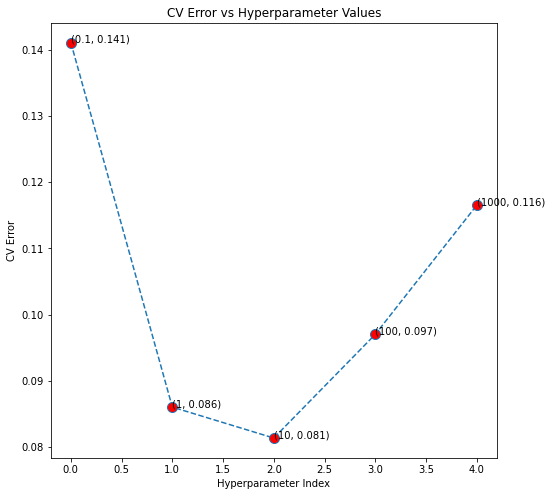

In [24]:
# Perform Grid Search CV for TF-IDF using Logistic Regression on CV data with fewer splits
best_params_cv_tfidf, cv_scores_cv_tfidf = perform_grid_search_cv_logistic_regression(X_cv_tfidf, y_cv, n_splits=5)
print('Optimal Parameters for Logistic Regression (CV) with TF-IDF are:', best_params_cv_tfidf)

# Define the hyperparameter values used in the grid search
params = [0.1, 1, 10, 100, 1000]
plot_cv_error(cv_scores_cv_tfidf, params)

Training and evaluating Logistic Regression model for TF-IDF on Test Data...
Training Logistic Regression model with parameters: {'C': 10}
Training completed. Evaluating the model...


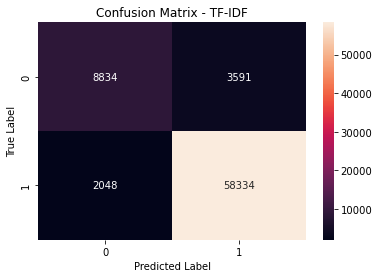

Accuracy (Test) with TF-IDF: 0.9225486560358207
Classification Report (Test) with TF-IDF:
 {'0': {'precision': 0.8117993015989707, 'recall': 0.7109859154929578, 'f1-score': 0.7580555198009182, 'support': 12425}, '1': {'precision': 0.9420104965684295, 'recall': 0.9660826073995562, 'f1-score': 0.9538947075801057, 'support': 60382}, 'accuracy': 0.9225486560358207, 'macro avg': {'precision': 0.8769048990837001, 'recall': 0.838534261446257, 'f1-score': 0.855975113690512, 'support': 72807}, 'weighted avg': {'precision': 0.9197890879470673, 'recall': 0.9225486560358207, 'f1-score': 0.9204734444027133, 'support': 72807}}


In [25]:
# Evaluate Logistic Regression for TF-IDF on Test Data
print("Training and evaluating Logistic Regression model for TF-IDF on Test Data...")
accuracy_tfidf, report_tfidf = evaluate_logistic_regression(X_train_tfidf, y_train, X_test_tfidf, y_test, best_params_cv_tfidf, 'TF-IDF')
print(f'Accuracy (Test) with TF-IDF: {accuracy_tfidf}')
print(f'Classification Report (Test) with TF-IDF:\n', report_tfidf)

## W2V

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Optimal Parameters for Logistic Regression (CV) with Word2Vec are: {'C': 10}


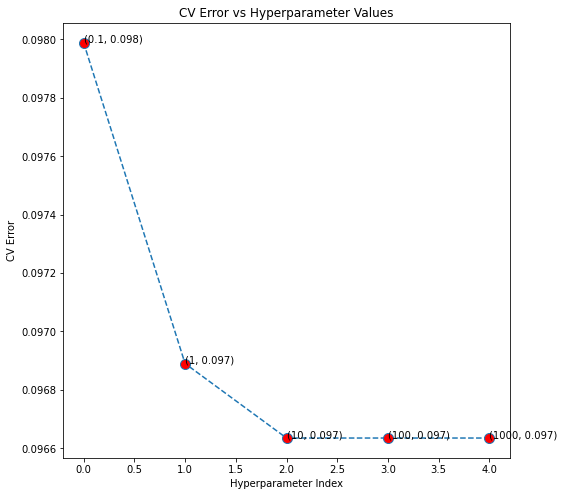

In [26]:
# Perform Grid Search CV for Word2Vec using Logistic Regression on CV data with fewer splits
best_params_cv_w2v, cv_scores_cv_w2v = perform_grid_search_cv_logistic_regression(X_cv_w2v, y_cv, n_splits=5)
print('Optimal Parameters for Logistic Regression (CV) with Word2Vec are:', best_params_cv_w2v)

# Define the hyperparameter values used in the grid search
params = [0.1, 1, 10, 100, 1000]
plot_cv_error(cv_scores_cv_w2v, params)

Training and evaluating Logistic Regression model for Word2Vec on Test Data...
Training Logistic Regression model with parameters: {'C': 10}
Training completed. Evaluating the model...


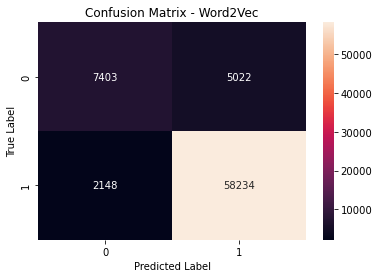

Accuracy (Test) with Word2Vec: 0.9014929883115634
Classification Report (Test) with Word2Vec:
 {'0': {'precision': 0.7751020835514606, 'recall': 0.5958148893360161, 'f1-score': 0.673734983618493, 'support': 12425}, '1': {'precision': 0.9206083217402302, 'recall': 0.9644264847139876, 'f1-score': 0.9420081204807584, 'support': 60382}, 'accuracy': 0.9015204581977008, 'macro avg': {'precision': 0.8478552026458455, 'recall': 0.7801206870250019, 'f1-score': 0.8078715520496258, 'support': 72807}, 'weighted avg': {'precision': 0.8957767120118323, 'recall': 0.9015204581977008, 'f1-score': 0.8962255209297035, 'support': 72807}}


In [27]:
# Evaluate Logistic Regression for Word2Vec on Test Data
print("Training and evaluating Logistic Regression model for Word2Vec on Test Data...")
accuracy_w2v, report_w2v = evaluate_logistic_regression(X_train_w2v, y_train, X_test_w2v, y_test, best_params_cv_w2v, 'Word2Vec')
print(f'Accuracy (Test) with Word2Vec: {accuracy_test_w2v}')
print(f'Classification Report (Test) with Word2Vec:\n', report_w2v)

In [28]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the following variables already defined:
# accuracy_bow, report_bow
# accuracy_tfidf, report_tfidf
# accuracy_w2v, report_w2v

# Function to extract relevant metrics from the classification reports
def extract_overall_metrics(report):
    return {
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }

# Extract overall metrics for each vectorization method
metrics_bow = extract_overall_metrics(report_bow)
metrics_tfidf = extract_overall_metrics(report_tfidf)
metrics_w2v = extract_overall_metrics(report_w2v)

# Create a DataFrame to hold the data
data = {
    'Vectorization': ['BoW', 'TF-IDF', 'Word2Vec'],
    'Accuracy': [f"{metrics_bow['Accuracy'] * 100:.2f}%", f"{metrics_tfidf['Accuracy'] * 100:.2f}%", f"{metrics_w2v['Accuracy'] * 100:.2f}%"],
    'Precision': [f"{metrics_bow['Precision']:.2f}", f"{metrics_tfidf['Precision']:.2f}", f"{metrics_w2v['Precision']:.2f}"],
    'Recall': [f"{metrics_bow['Recall']:.2f}", f"{metrics_tfidf['Recall']:.2f}", f"{metrics_w2v['Recall']:.2f}"],
    'F1-Score': [f"{metrics_bow['F1-Score']:.2f}", f"{metrics_tfidf['F1-Score']:.2f}", f"{metrics_w2v['F1-Score']:.2f}"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame as a pretty table without the index column
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------+-----------+--------+----------+
| Vectorization | Accuracy | Precision | Recall | F1-Score |
+---------------+----------+-----------+--------+----------+
|      BoW      |  92.15%  |   0.89    |  0.82  |   0.85   |
|    TF-IDF     |  92.25%  |   0.88    |  0.84  |   0.86   |
|   Word2Vec    |  90.15%  |   0.85    |  0.78  |   0.81   |
+---------------+----------+-----------+--------+----------+
